# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 10 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = int(1e4)  # use this

theta = 1
sample = sps.uniform(loc=0, scale=theta).rvs(size=N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
first = 2 * np.cumsum(sample) / np.arange(1, N + 1)
second = np.cumsum(sample) / np.arange(1, N + 1) + np.maximum.accumulate(sample) / 2
third = np.arange(2, N + 2) * np.minimum.accumulate(sample)
fourth = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
fifth = np.arange(2, N + 2) / np.arange(1, N + 1) * np.maximum.accumulate(sample)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

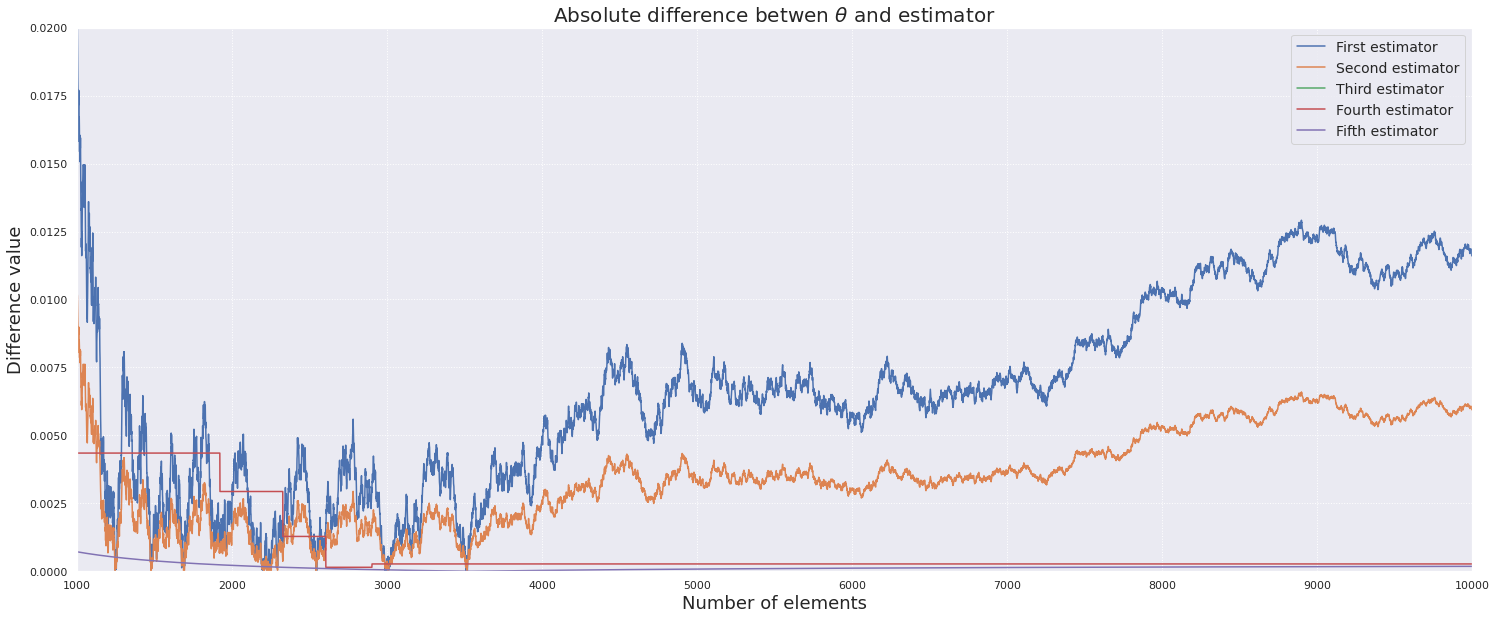

In [5]:
nums_elem = np.arange(1, N+1)
plt.figure(figsize=(25,10))
plt.plot(nums_elem, np.abs(first - theta), label="First estimator")
plt.plot(nums_elem, np.abs(second - theta), label="Second estimator")
plt.plot(nums_elem, np.abs(third - theta), label="Third estimator")
plt.plot(nums_elem, np.abs(fourth - theta), label="Fourth estimator")
plt.plot(nums_elem, np.abs(fifth - theta), label="Fifth estimator")
plt.grid(ls=':')
plt.ylim(0, 0.02)
plt.xlim(1000, N)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Difference value', fontsize=18)
plt.title(r'Absolute difference betwen $\theta$ and estimator', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

По графику видно, что первая, вторая и третья оценки: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}$ сильно отличаются от истинного значения $\theta$. Поэтому исключим их.

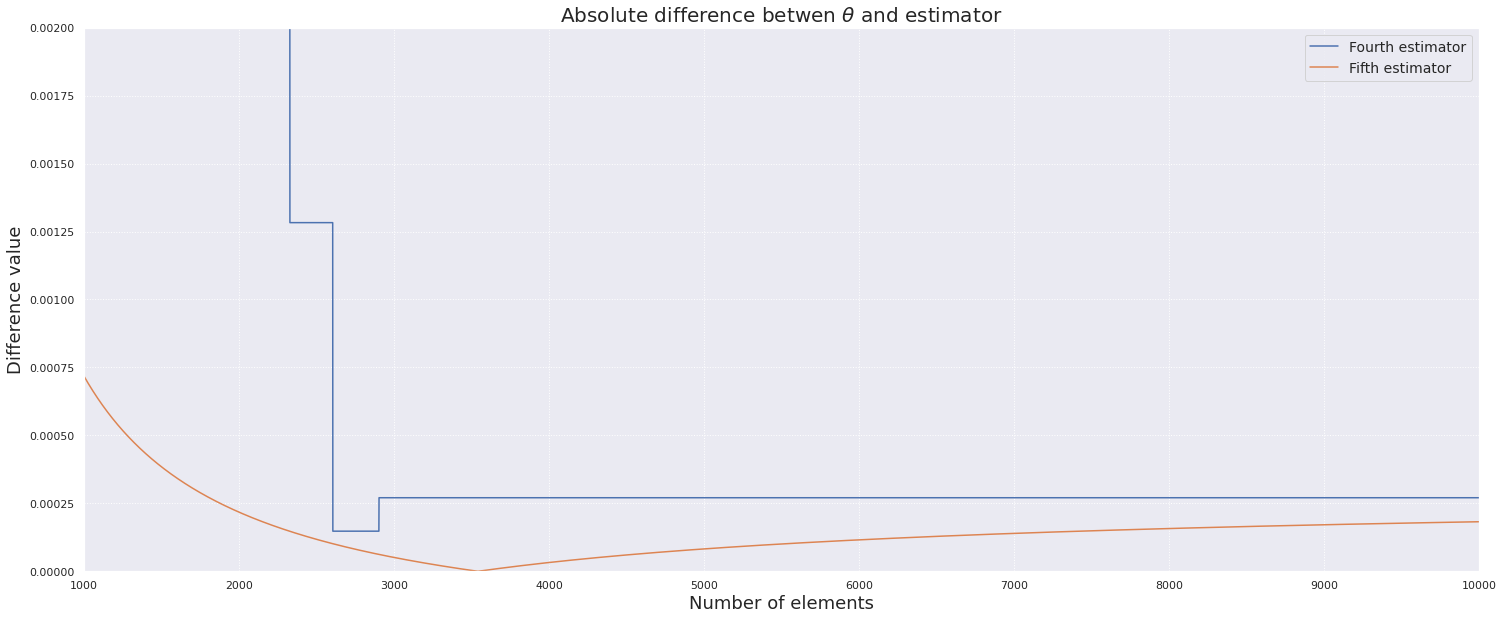

In [6]:
plt.figure(figsize=(25,10))
plt.plot(nums_elem, np.abs(fourth - theta), label="Fourth estimator")
plt.plot(nums_elem, np.abs(fifth - theta), label="Fifth estimator")
plt.grid(ls=':')
plt.ylim(0, 0.002)
plt.xlim(1000, N)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Difference value', fontsize=18)
plt.title(r'Absolute difference betwen $\theta$ and estimator', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__  Лучше всех получилась пятая оценка $\; \frac{n+1}{n} X_{(n)}$  
Это и логично, ведь если сравнивать оценки в равномерном подходе с квадратичной функцией потерь как мы это делали в домашнем задании по статам, там такой результат и получался



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

Выберем значения $\theta$

In [7]:
theta_mas = [0.5, 4, 8, 11, 21]

Построим графики для данных $\theta$:

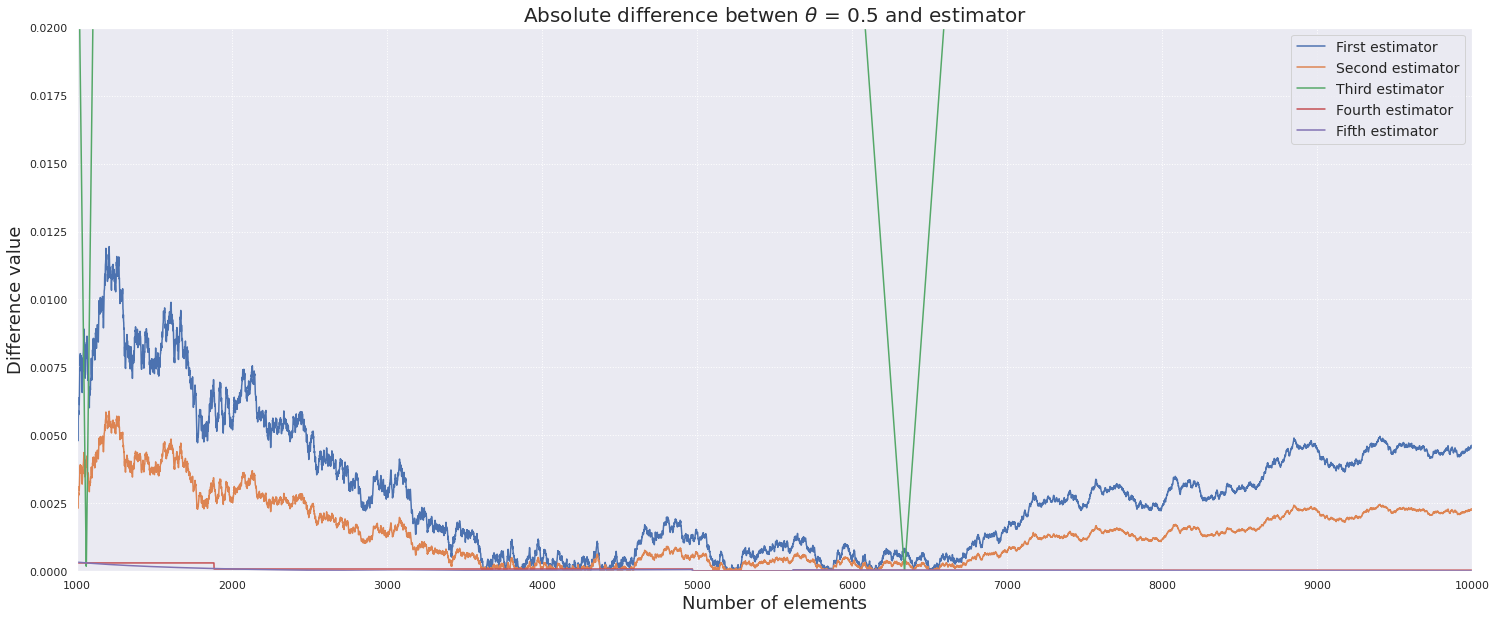

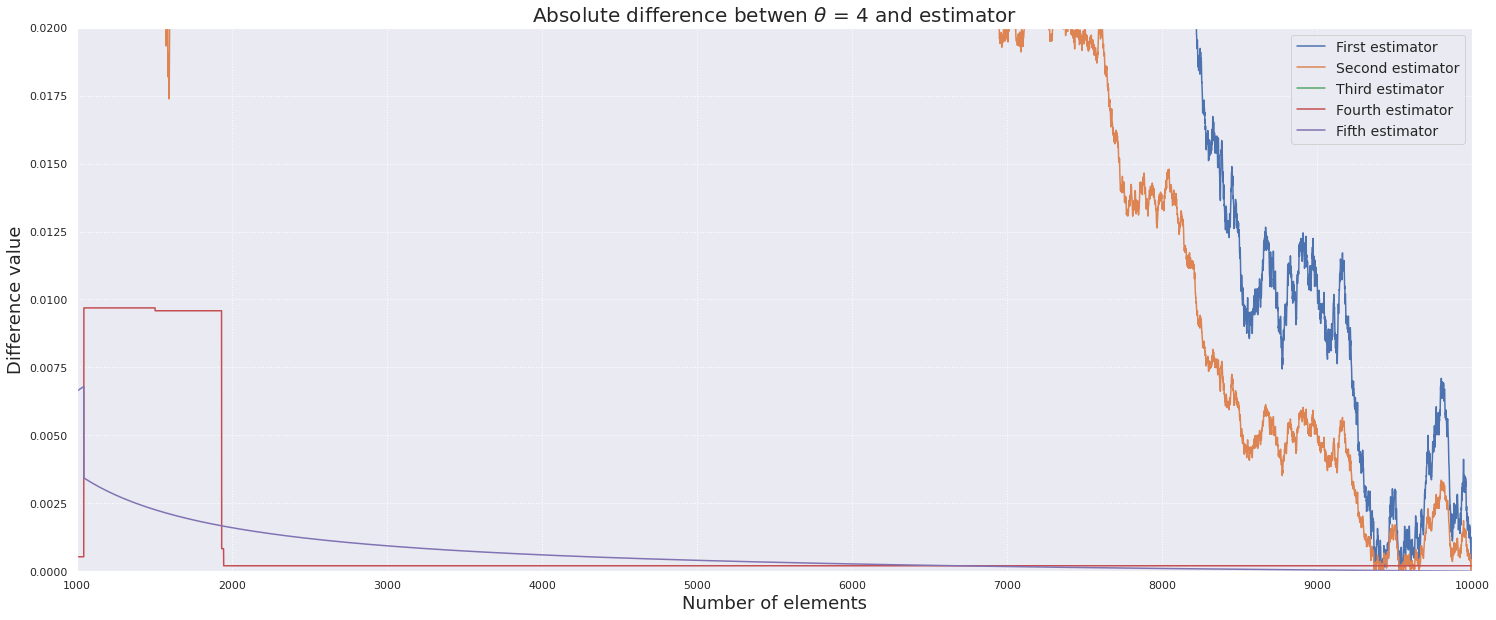

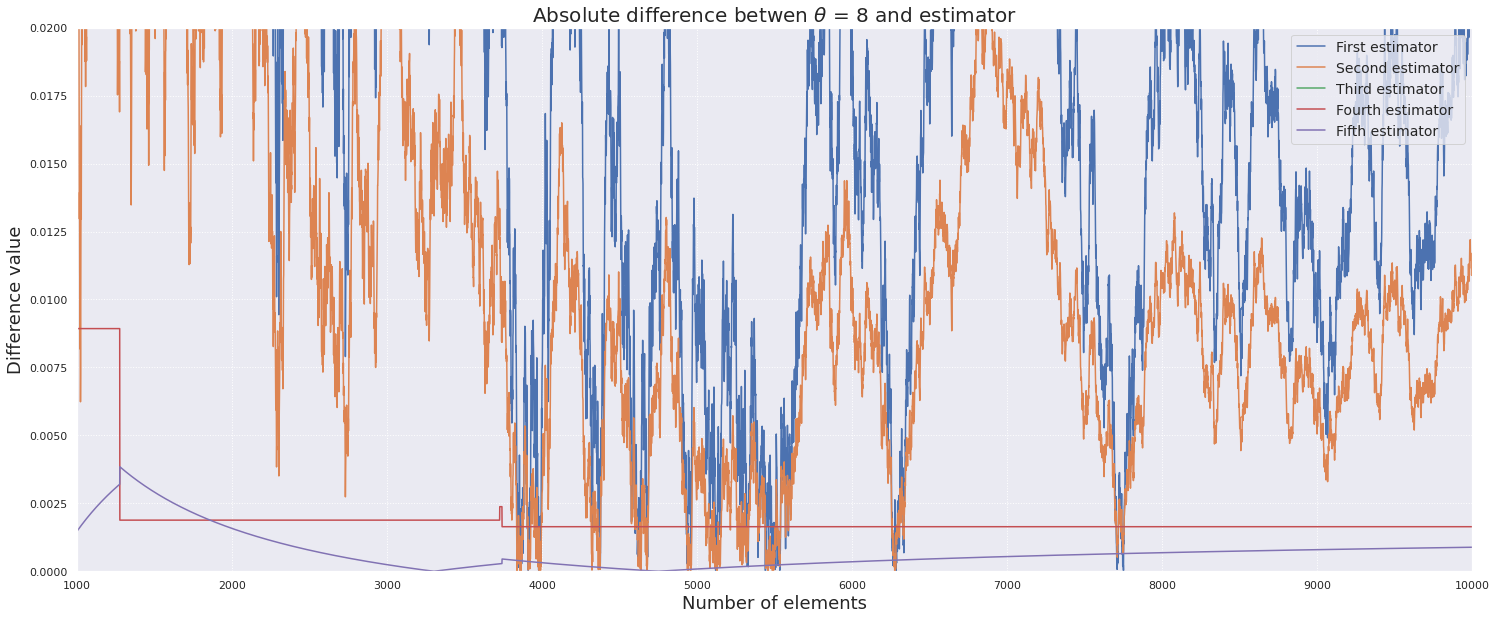

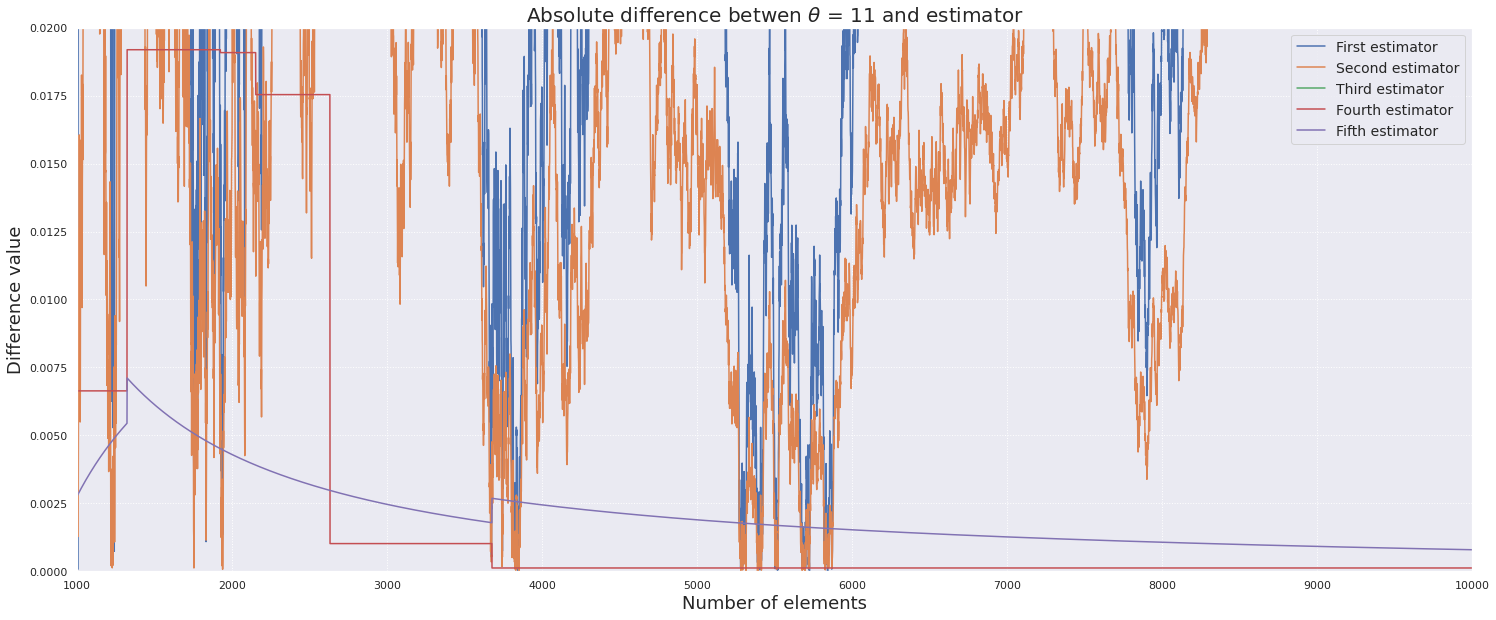

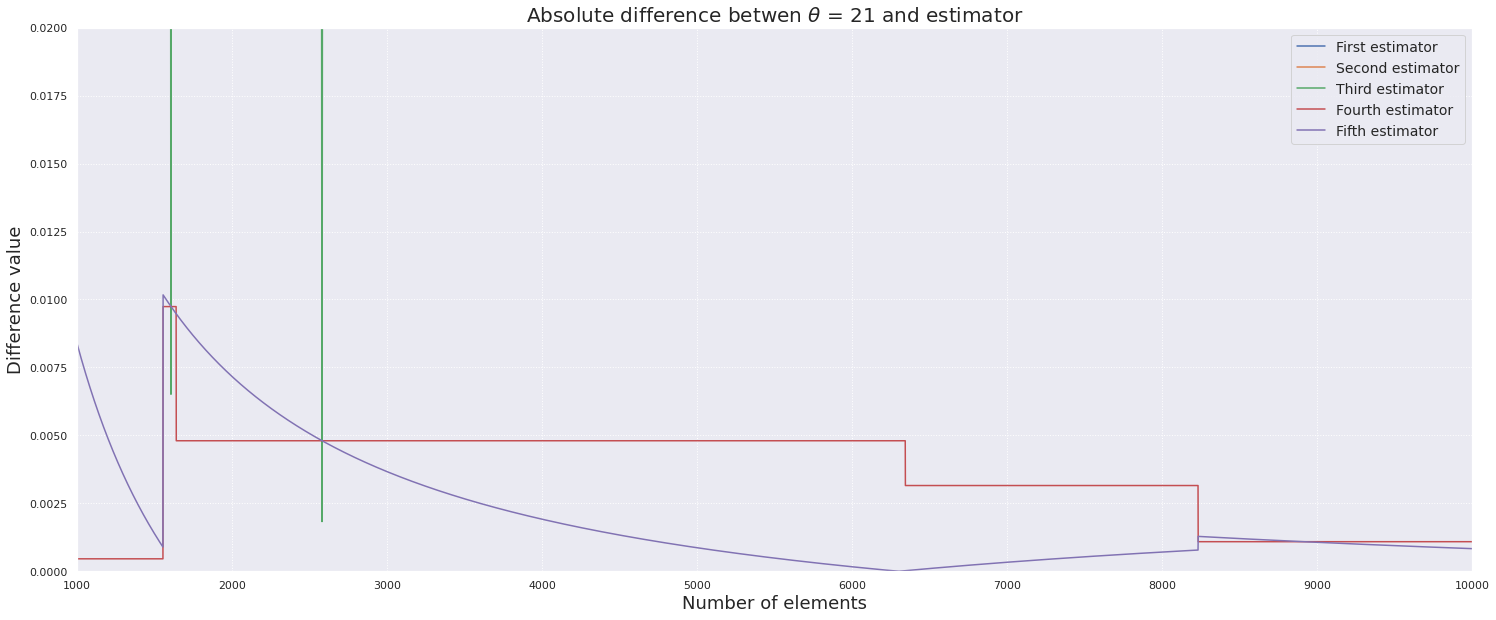

In [8]:
for t in theta_mas: 
    theta = t
    sample = sps.uniform(loc=0, scale=theta).rvs(size=N)

    first = 2 * np.cumsum(sample) / np.arange(1, N + 1)
    second = np.cumsum(sample) / np.arange(1, N + 1) + np.maximum.accumulate(sample) / 2
    third = np.arange(2, N + 2) * np.minimum.accumulate(sample)
    fourth = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
    fifth = np.arange(2, N + 2) / np.arange(1, N + 1) * np.maximum.accumulate(sample)

    nums_elem = np.arange(1, N+1)
    plt.figure(figsize=(25,10))
    plt.plot(nums_elem, np.abs(first - theta), label="First estimator")
    plt.plot(nums_elem, np.abs(second - theta), label="Second estimator")
    plt.plot(nums_elem, np.abs(third - theta), label="Third estimator")
    plt.plot(nums_elem, np.abs(fourth - theta), label="Fourth estimator")
    plt.plot(nums_elem, np.abs(fifth - theta), label="Fifth estimator")
    plt.grid(ls=':')
    plt.ylim(0, 0.020)
    plt.xlim(1000, N)
    plt.xlabel('Number of elements', fontsize=18)
    plt.ylabel('Difference value', fontsize=18)
    plt.title(r'Absolute difference betwen $\theta$ = {} and estimator'.format(t), fontsize=20)
    plt.legend(fontsize=14, loc=1)
    plt.show()

Исключим первую, вторую и третью оценки, потому что они оказались самыми плохими:

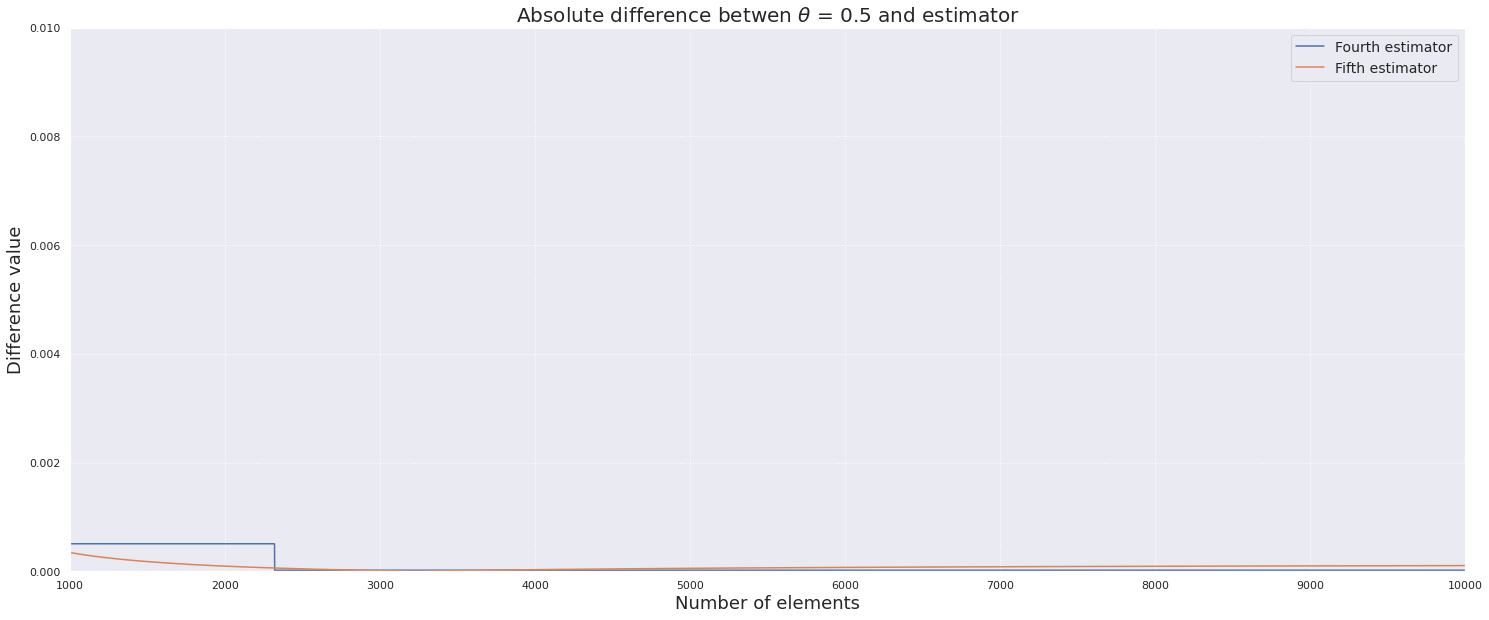

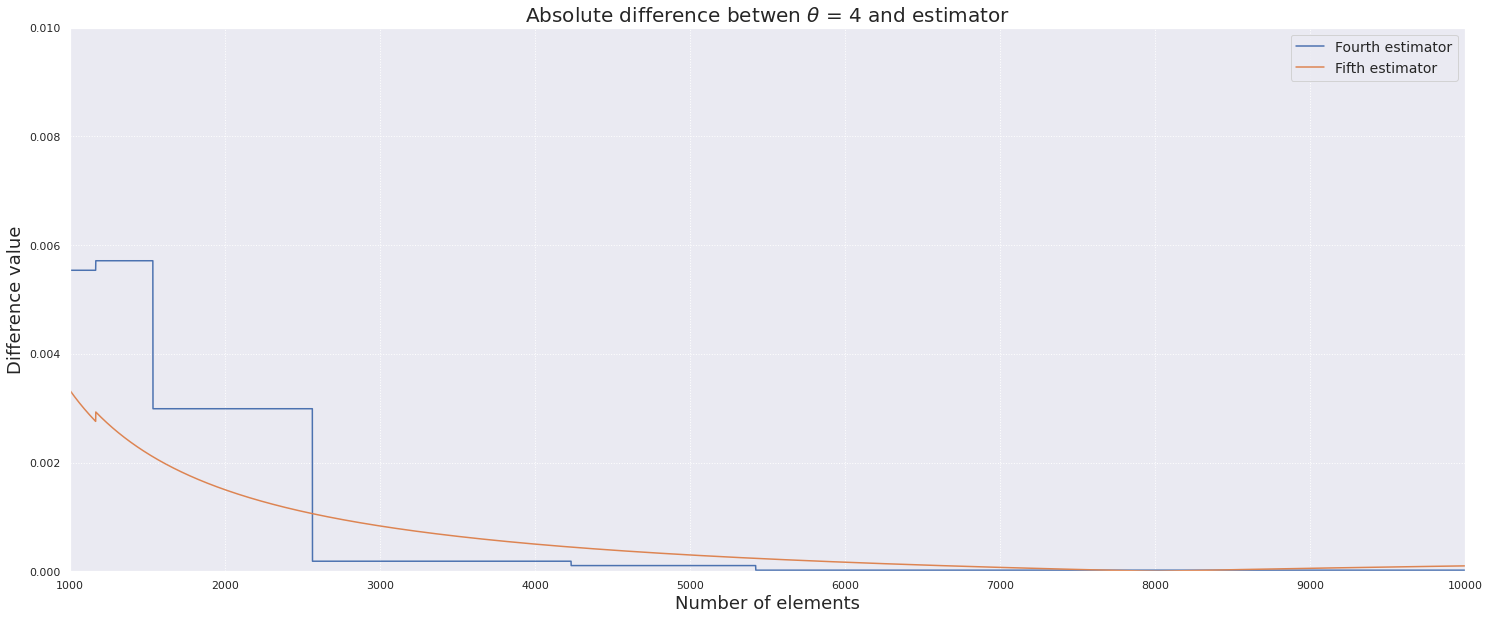

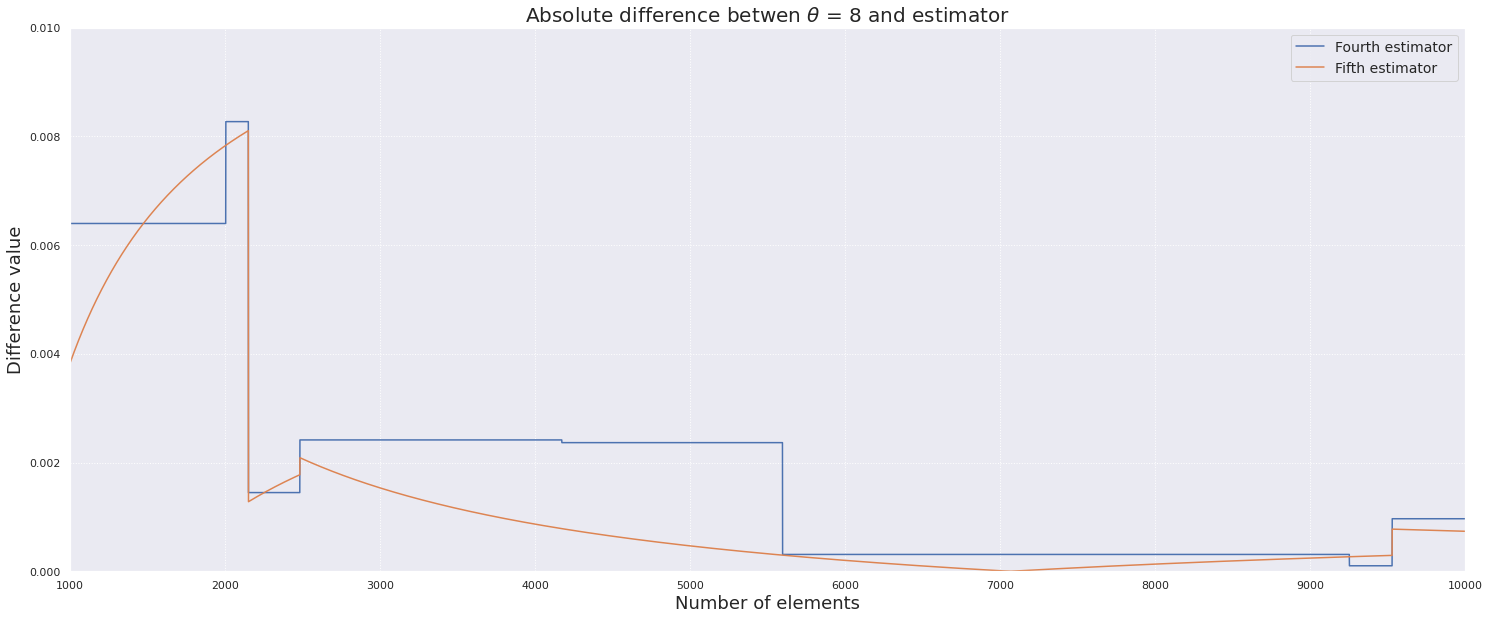

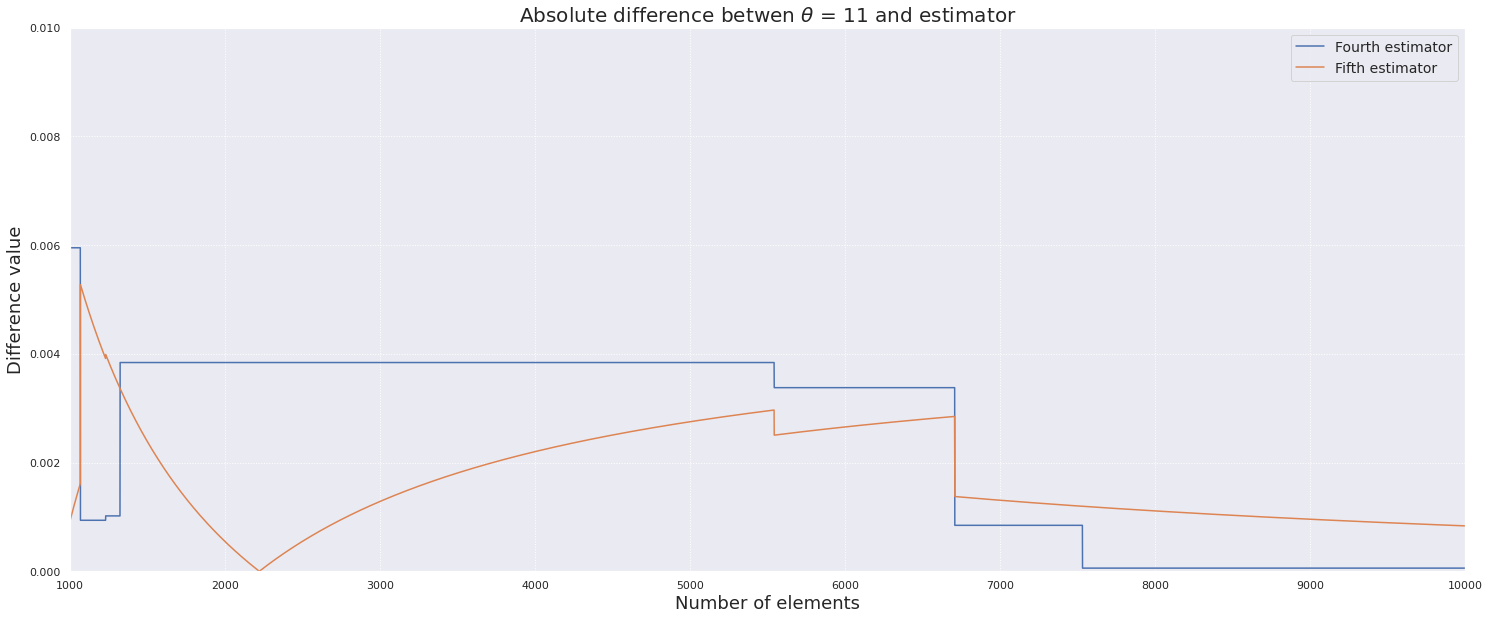

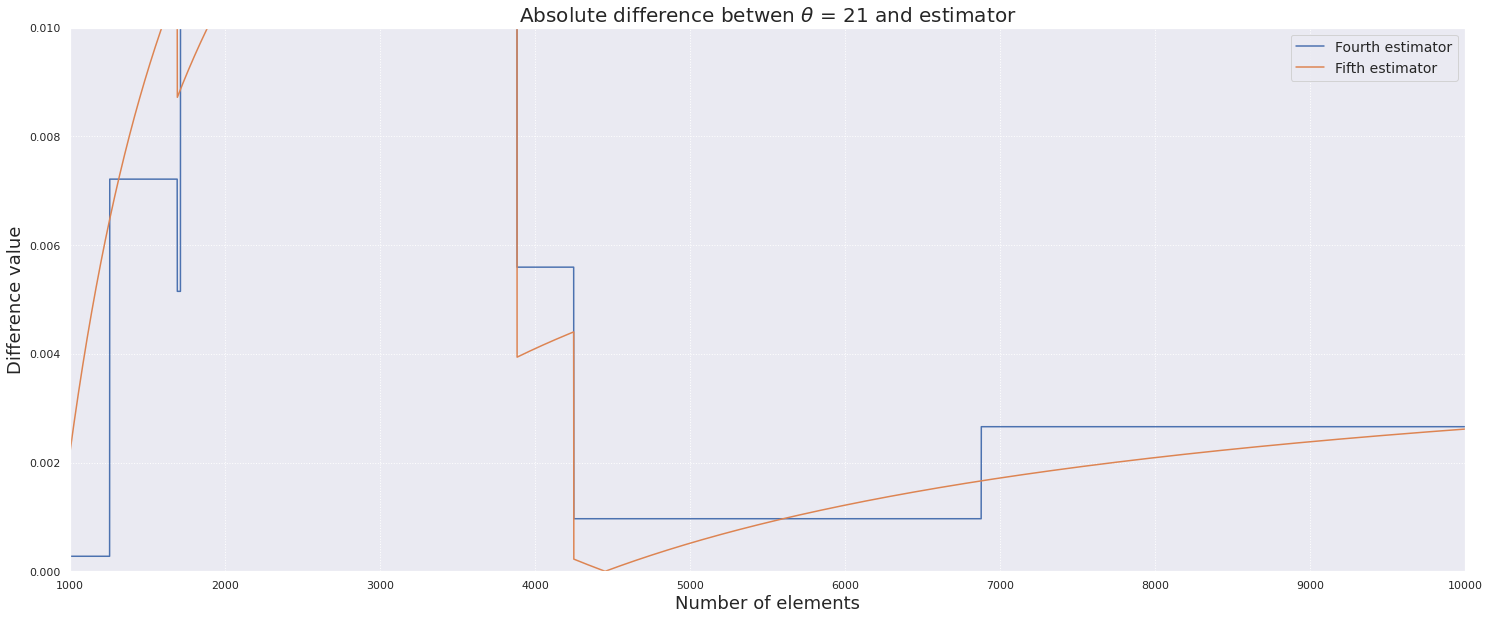

In [9]:
for t in theta_mas: 
    theta = t
    sample = sps.uniform(loc=0, scale=theta).rvs(size=N)

    first = 2 * np.cumsum(sample) / np.arange(1, N + 1)
    second = np.cumsum(sample) / np.arange(1, N + 1) + np.maximum.accumulate(sample) / 2
    third = np.arange(2, N + 2) * np.minimum.accumulate(sample)
    fourth = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
    fifth = np.arange(2, N + 2) / np.arange(1, N + 1) * np.maximum.accumulate(sample)

    nums_elem = np.arange(1, N+1)
    plt.figure(figsize=(25,10))
    plt.plot(nums_elem, np.abs(fourth - theta), label="Fourth estimator")
    plt.plot(nums_elem, np.abs(fifth - theta), label="Fifth estimator")
    plt.grid(ls=':')
    plt.ylim(0, 0.010)
    plt.xlim(1000, N)
    plt.xlabel('Number of elements', fontsize=18)
    plt.ylabel('Difference value', fontsize=18)
    plt.title(r'Absolute difference betwen $\theta$ = {} and estimator'.format(t), fontsize=20)
    plt.legend(fontsize=14, loc=1)
    plt.show()

Здесь самыми неудачными оказались также первая, вторая и третья оценки: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}$  
А удачной оценкой при даных $\theta$ оказалась так же пятая оценка $\; \frac{n+1}{n} X_{(n)}$, но при значении $\theta$ = 11 лучше получилась четвертая оценка $\; X_{(1)}+X_{(n)}$

Сделайте вывод.


__Вывод:__  Сравнивая значения при разных $\theta$ получаем, что чем меньше значение $\theta$, тем меньше получается абсолютная разница между ее значением и значением оценок. Почти всегда побеждала пятая оценка, но так же очень близко к ней была четвертая оценка. Значит изменение $\theta$ не сильно влияет на сравнение оценок, только на очень близкие друг к другу.  
Такой результат является иллюстрацией, если бы мы сравнивали оценки теоретически в равномерном подходе с квадратичной функцией потерь.  

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [10]:
N = int(1e4)
theta = 1
sample = sps.expon(scale=theta).rvs(size=N)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

Для удобства напишем функцию для вычесления оценки для всех n, принимающую выборку и k

In [11]:
def estimator(sample, k):
    return np.float_power(np.float_power(np.cumsum(np.float_power(sample, k)) / np.arange(1, N + 1), -1) * np.math.factorial(k), 1 / k)

Далее выберем k для которых будем считать оцунку и проводить исследование

In [12]:
k_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Построим графики для каждого k

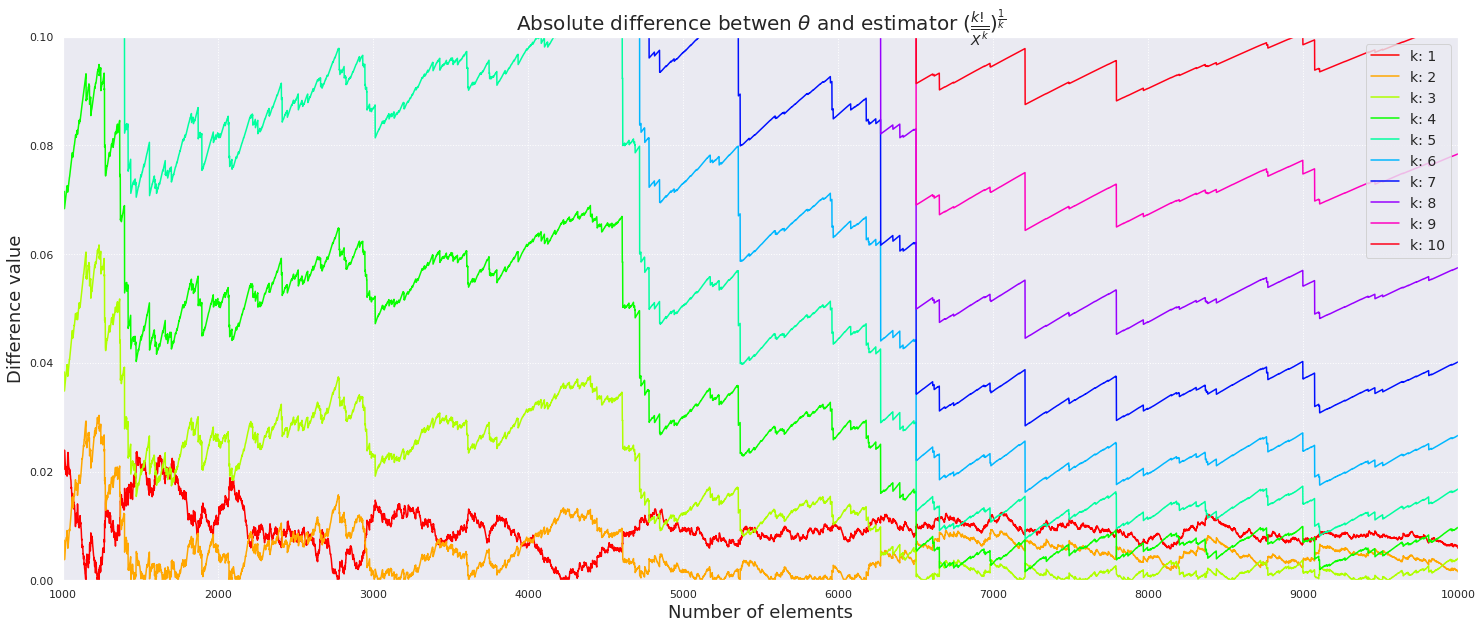

In [13]:
nums_elem = np.arange(1, N+1)

cmap = plt.cm.get_cmap('hsv', len(k_array)) # красивая генерация цвета с https://overcoder.net/q/141612/%D0%BA%D0%B0%D0%BA-%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5-%D1%86%D0%B2%D0%B5%D1%82%D0%B0-%D0%B2-matplotlib

plt.figure(figsize=(25,10))
for i, k in enumerate(k_array):
    plt.plot(nums_elem, np.abs(estimator(sample, k) - theta), label='k: {}'.format(k), c=cmap(i))
plt.grid(ls=':')
plt.ylim(0, 0.1)
plt.xlim(1000, N)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Difference value', fontsize=18)
plt.title(r'Absolute difference betwen $\theta$ and estimator $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Сделайте вывод.


__Вывод:__  По графику видно, что самой лучшей оценка является при самых маленьких k. Значит наилучшая оценка достигается при наименьших k. Но при разных количествах элементов в выборке, наименьшее значение k немного меняется от 1 до 4. 
Заметим, что данная статистика является асиптотически нормальной оценкой (из номера в дз по статам). 

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Возьмем распределение с плотностью p(x) = $\frac{5}{x^6} I[1, \infty]$

In [14]:
N = int(1e4)

# my distribution
class distribution(sps.rv_continuous):
    def _pdf(self, x):
        return 5 / np.power(x, 6)

In [15]:
my_dist = distribution(a=1, name='my_dist')
sample = my_dist.rvs(size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

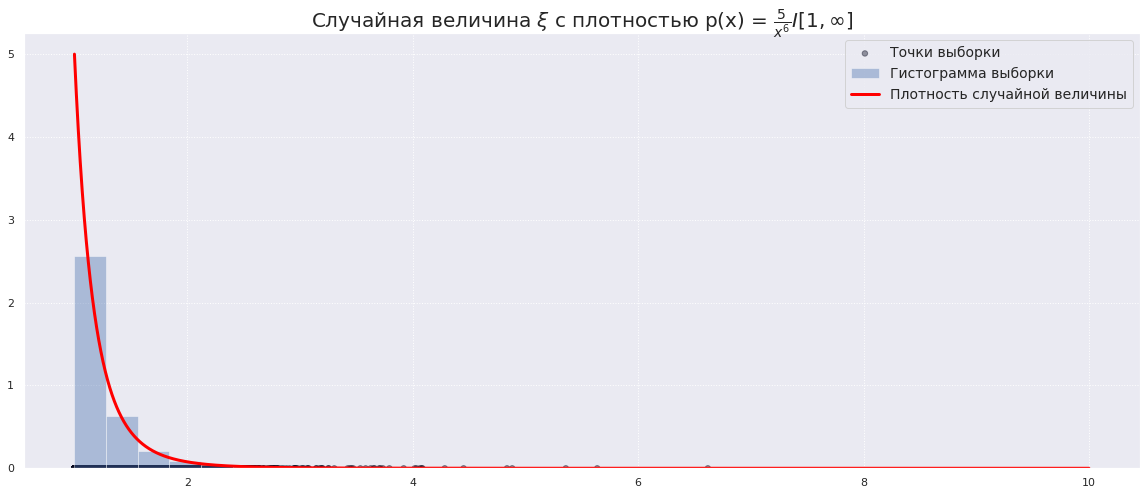

In [16]:
# пользуемся привилегией выполненных заданий по АД
grid = np.linspace(1, 10, N)
plt.figure(figsize=(20, 8))
plt.scatter(x=sample, y=[0] * N, alpha=0.4, c=[5] * N, s=[30] * N, label='Точки выборки')
plt.hist(sample, bins=20, density=True, 
     alpha=0.4, label='Гистограмма выборки') 
plt.plot(grid, my_dist.pdf(grid), color='red', 
     lw=3, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi$ с плотностью p(x) = $\frac{5}{x^6} I[1, \infty]$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [17]:
s_square = np.cumsum(np.float_power(sample, 2)) / np.arange(1, N + 1) - np.square(np.cumsum(sample) / np.arange(1, N + 1))

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

Посчитаем дисперсию

In [18]:
m = np.cumsum(sample) / np.arange(1, N + 1)
disp = np.cumsum(np.float_power(sample - m, 2)) / np.arange(1, N + 1)

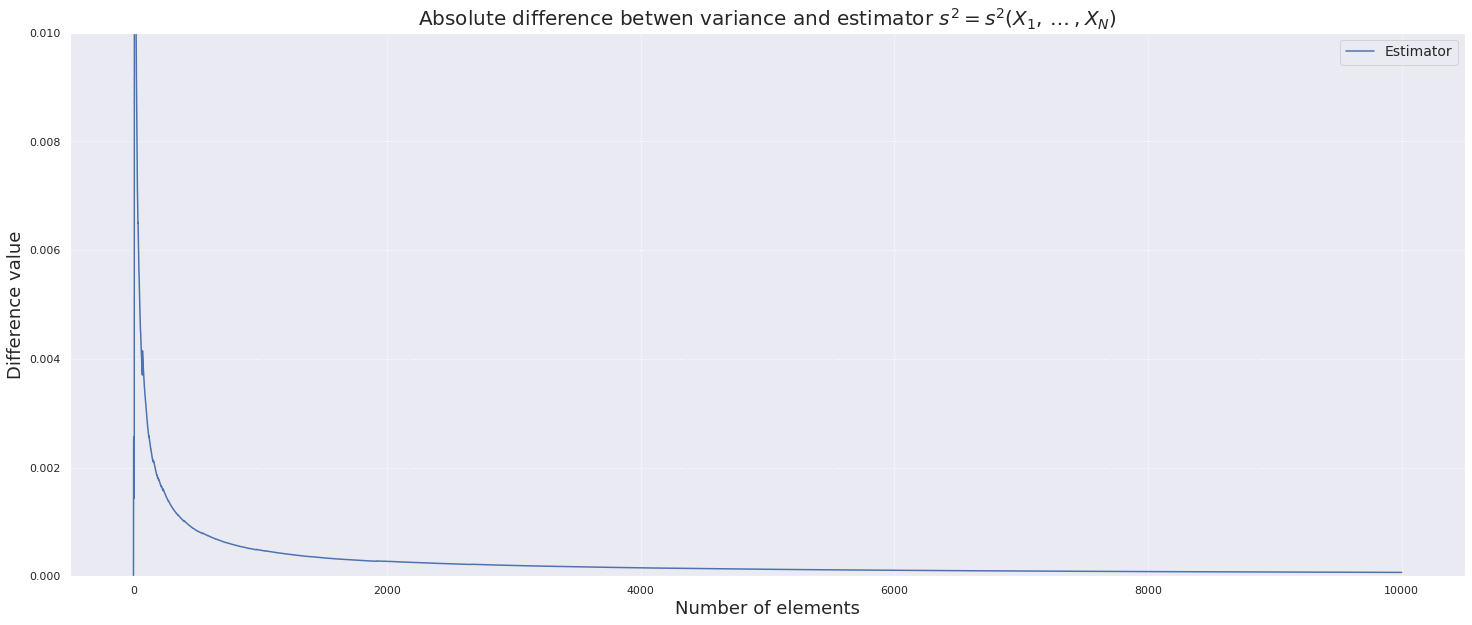

In [19]:
nums_elem = np.arange(1, N+1)
plt.figure(figsize=(25,10))
plt.plot(nums_elem, np.abs(s_square - disp), label="Estimator")
plt.grid(ls=':')
plt.ylim(0, 0.01)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Difference value', fontsize=18)
plt.title(r'Absolute difference betwen variance and estimator $s^2 = s^2(X_1,\dots, X_N)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

  __Вывод:__ по графику видно, что оценка дисперсии стремится к самой дисперсии при увеличении количества элементов в выборке. Это подтверждает свойство выборочной дисперсии: выборочная дисперсия является состоятельной оценкой теоретической дисперсией, то есть она стремится к теоретической дисперсии по вероятности. 

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


Построим график плотности распределения Коши

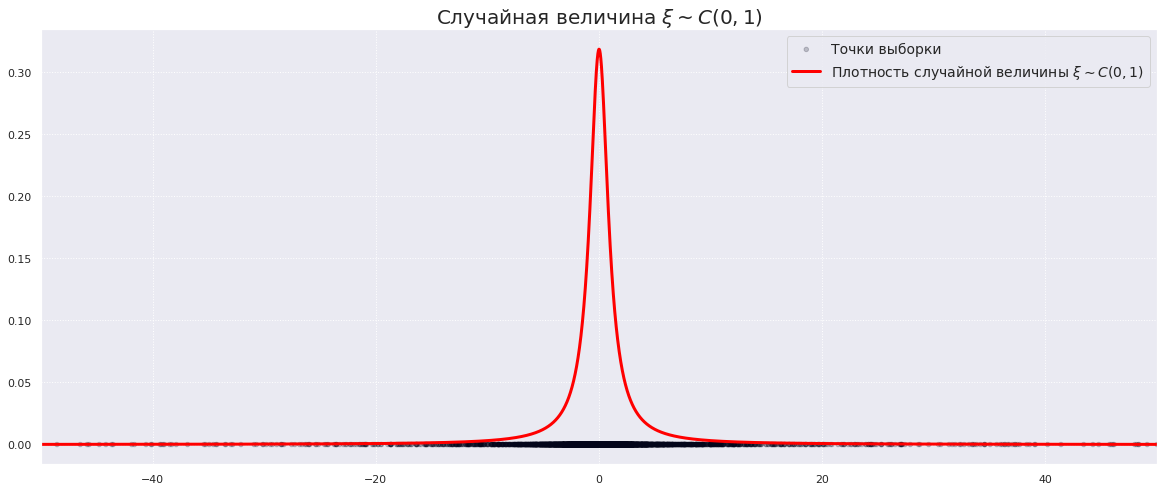

In [20]:
sample = sps.cauchy.rvs(size=N)

grid = np.linspace(-50, 50, N)
plt.figure(figsize=(20, 8))
plt.scatter(x=sample, y=[0] * N, alpha=0.2, c=[5] * N, s=[20] * N, label='Точки выборки')
plt.plot(grid, sps.cauchy.pdf(grid), color='red', 
     lw=3, label=r'Плотность случайной величины $\xi\sim C(0, 1)$')
plt.xlim(-50, 50)
plt.title(r'Случайная величина $\xi\sim C(0, 1)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')


  Далее посчитаем оценку дисперсии и построим график для нее

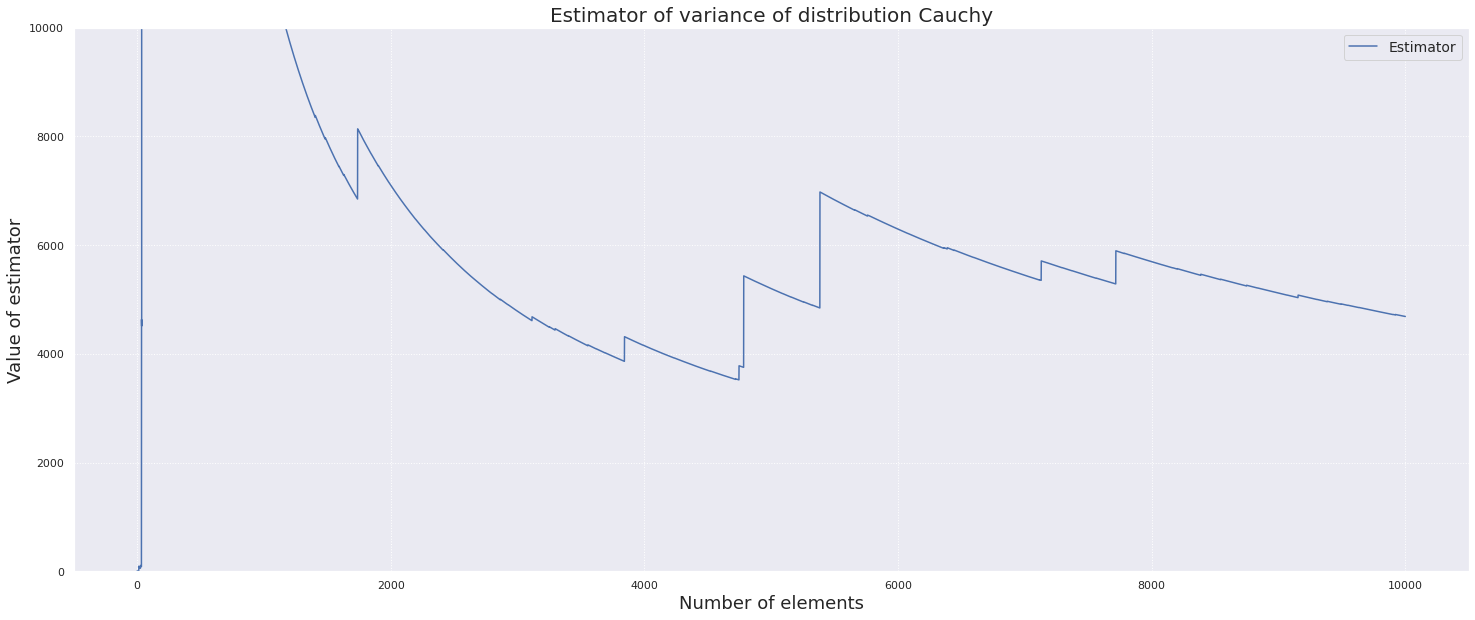

In [21]:
s_square = np.cumsum(np.float_power(sample, 2)) / np.arange(1, N + 1) - np.square(np.cumsum(sample) / np.arange(1, N + 1))

nums_elem = np.arange(1, N+1)
plt.figure(figsize=(25,10))
plt.plot(nums_elem, np.abs(s_square), label="Estimator")
plt.grid(ls=':')
plt.ylim(0, 10000)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Value of estimator', fontsize=18)
plt.title(r'Estimator of variance of distribution Cauchy', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

  __Вывод:__ График подтвеждает, что выборочная дисперсия распределения Коши бесконечно растет, но судя по графику это происходит не монотонно

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [22]:
N = int(1e4)
sample = sps.norm(loc=0, scale=1).rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [23]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

emperic = [ECDF(sample[:n]) for n in range(1, N + 1)]

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

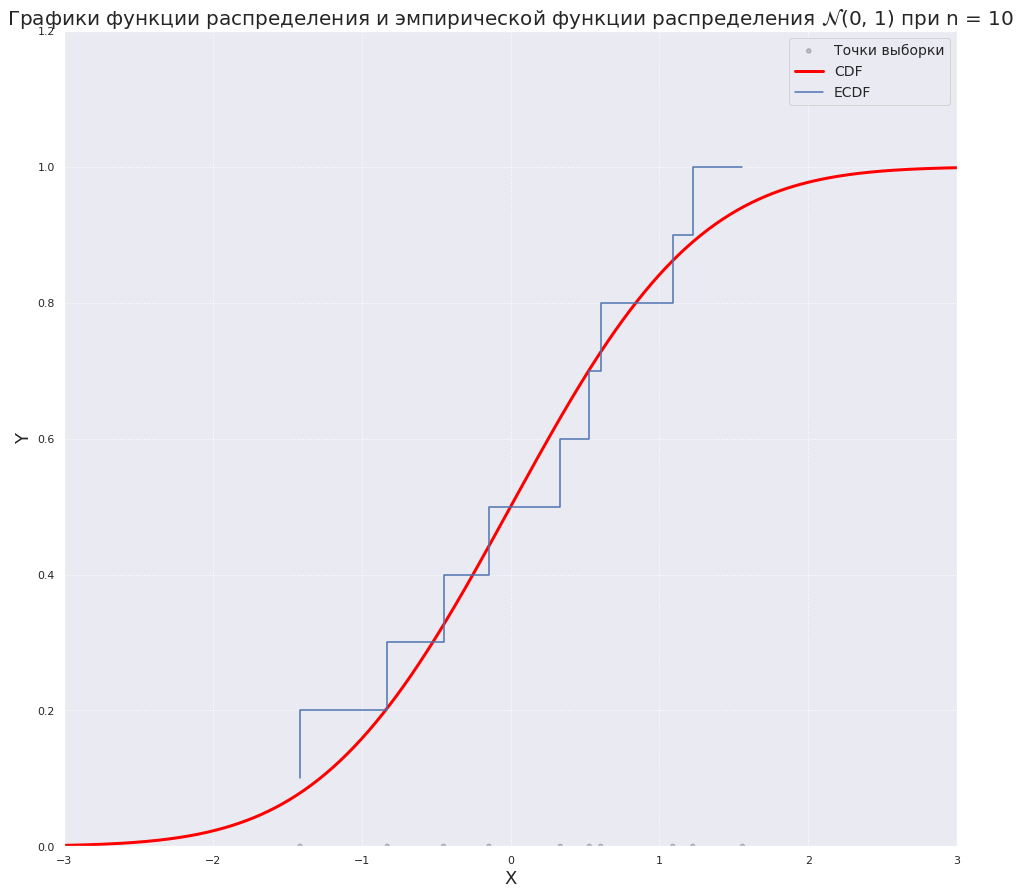

In [24]:
n = 10

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 10', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

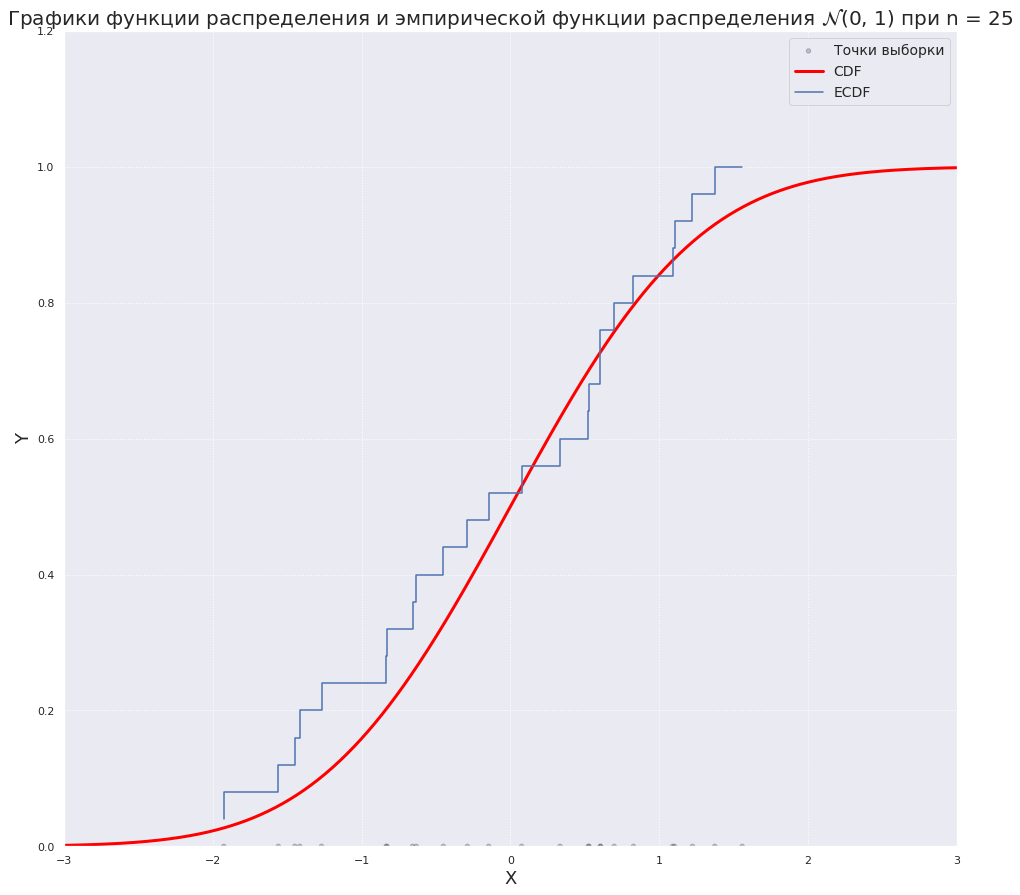

In [25]:
n = 25

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 25', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

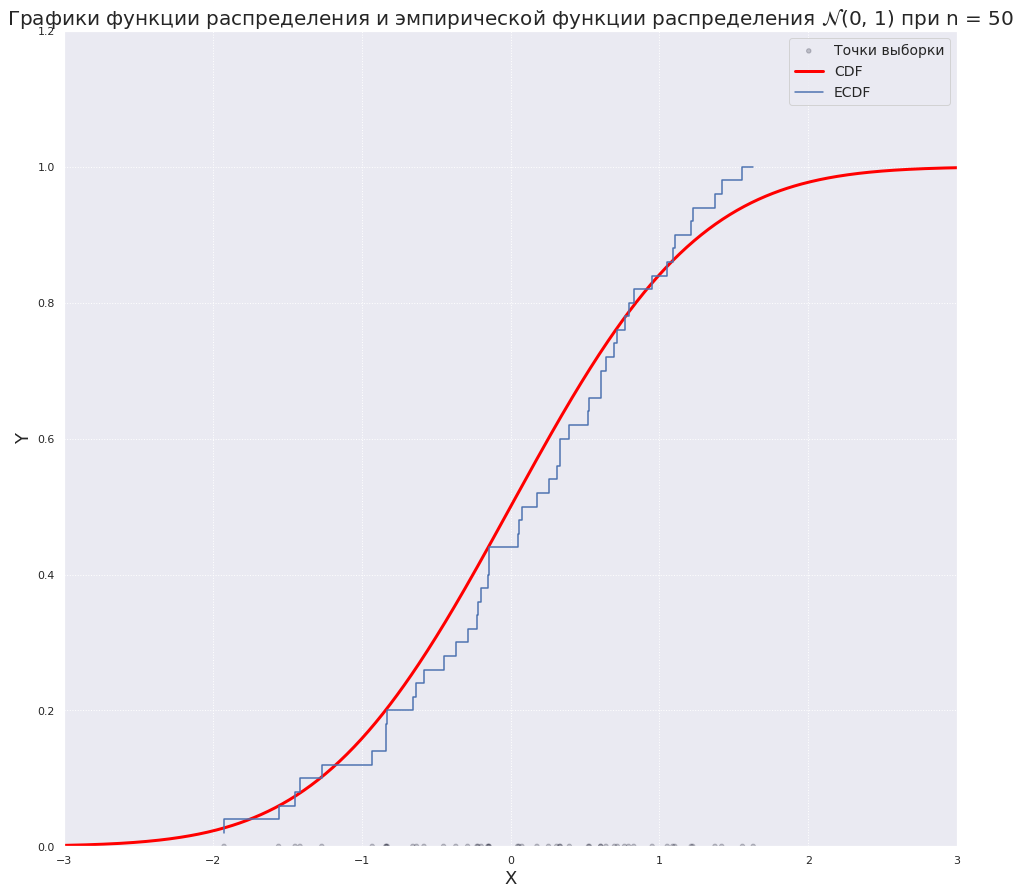

In [26]:
n = 50

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 50', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

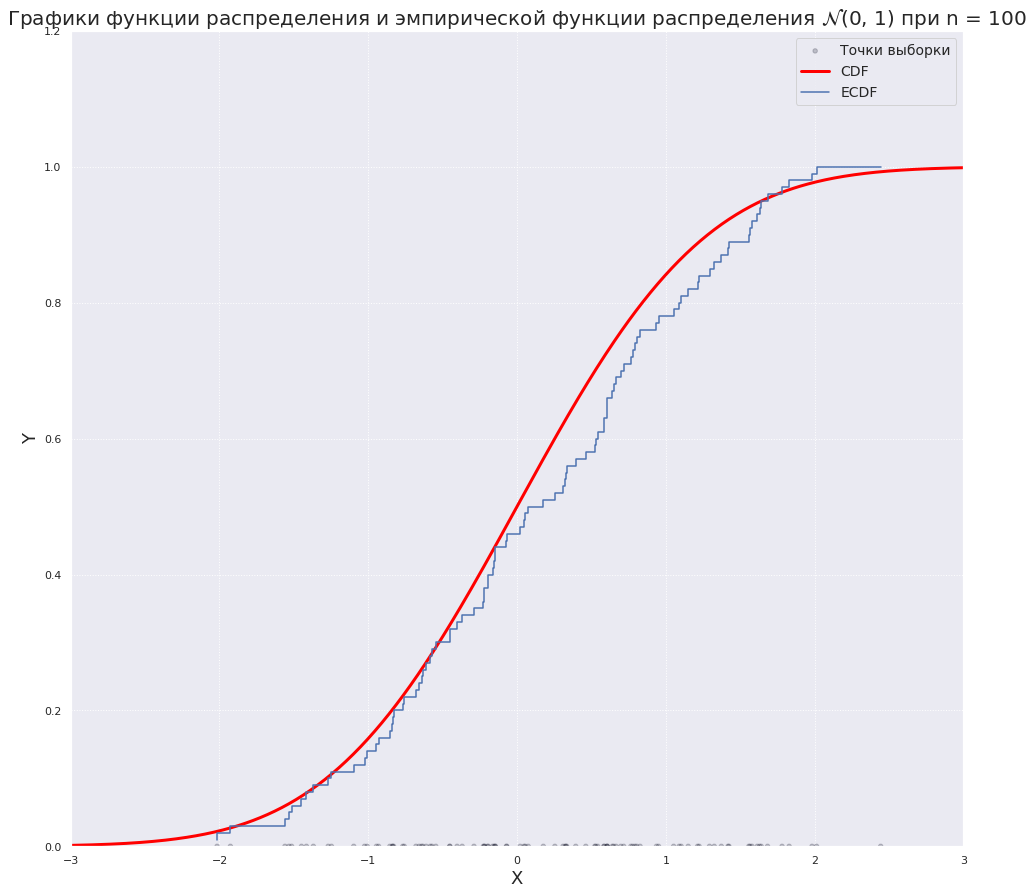

In [27]:
n = 100

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 100', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

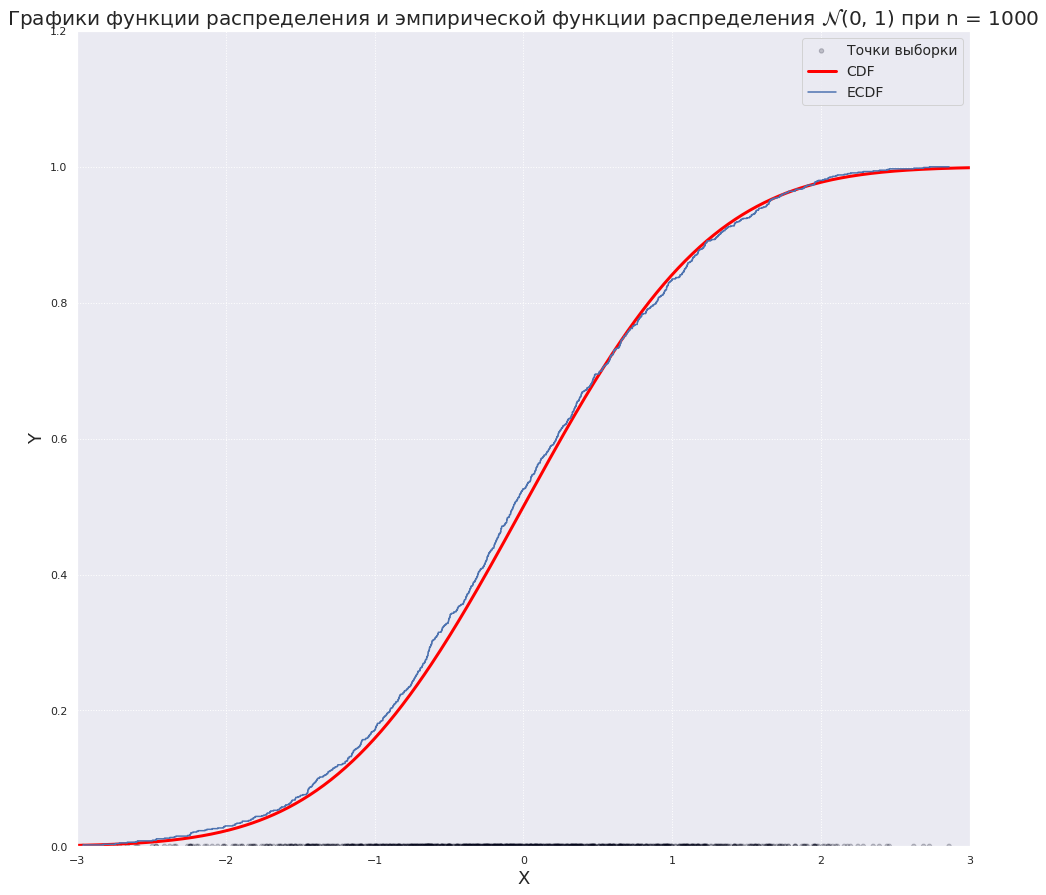

In [28]:
n = 1000

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 1000', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

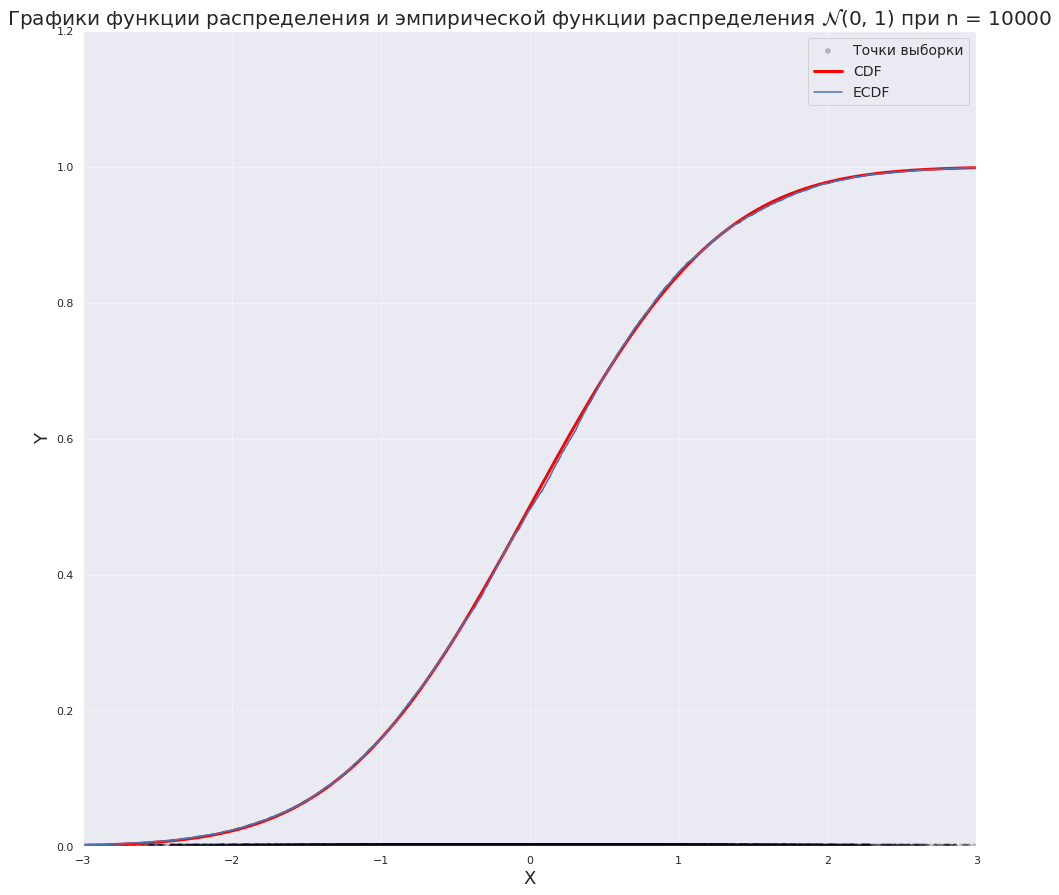

In [29]:
n = 10000

grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(16, 15))
plt.scatter(x=sample[:n], y=[0] * n, alpha=0.2, c=[5] * n, s=[20] * n, label='Точки выборки')
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid), color='red', 
     lw=3, label='CDF')
plt.step(emperic[n - 1].x, emperic[n - 1].y, label='ECDF')
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Графики функции распределения и эмпирической функции распределения $\mathcal{N}$(0, 1) при n = 10000', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

  __Вывод:__  По графикам видно, что при увеличении количества элементов в выборке эмпирическая функция распределения постепенно сглаживается и приближается по точности к обычной функции распределения. Это и логично, так как элементов становится больше, значит и различных значений тоже больше и следовательно ступенек у функции станет больше, и постепенно они сглаживаются. Эти графики иллюстрируют теорему о том, что при увеличении n предел абсолютной разницы эмпирической функции распределения и обычной стремится к нулю.

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


Воспользуемся тем соображением, что максимум достигается в точках выборки, т.к. функция распределения монотонная, а эмпирическая функция распределения на иксах между значениями выборки принимает константное значение. Следовательно достаточно посчитать только для иксов из выборки

In [30]:
diff = [np.max(np.abs(emperic[n].y - sps.norm(loc=0, scale=1).cdf(emperic[n].x))) for n in range(0, N)]
sqrt_diff = np.sqrt(np.arange(1, N + 1)) * diff

Построим график зависимостей статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 

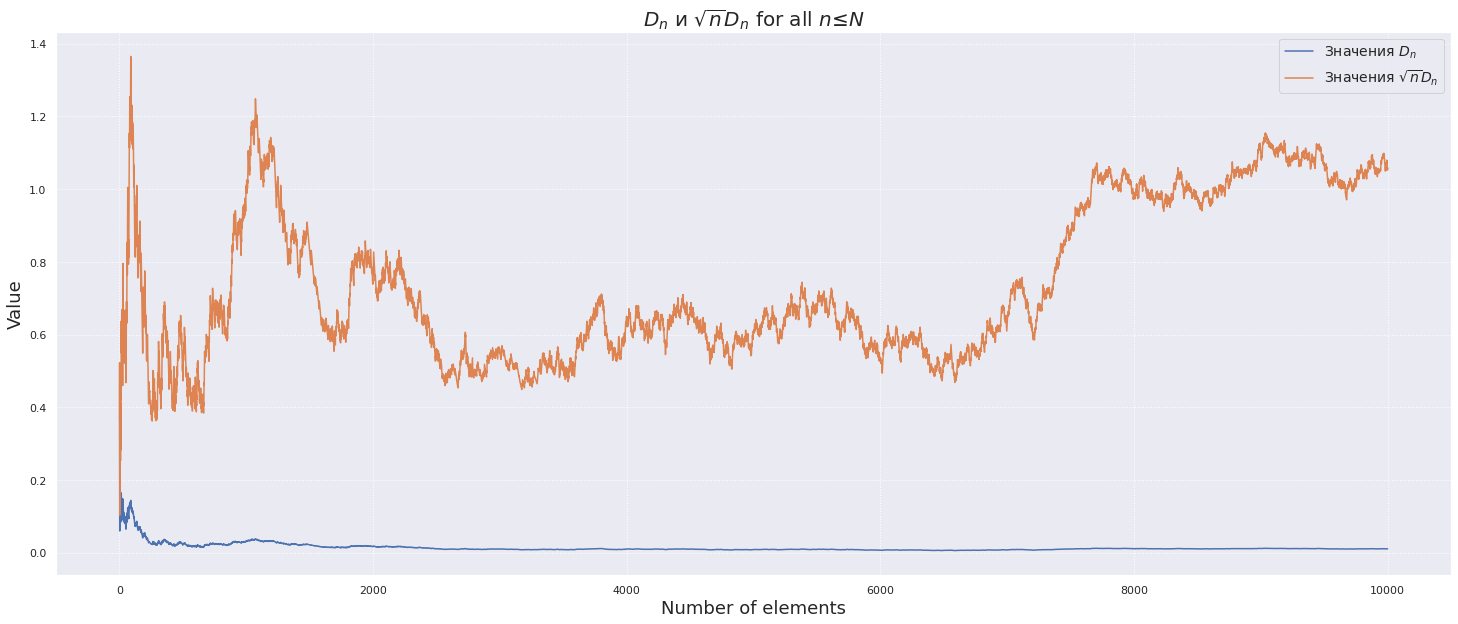

In [31]:
nums_elem = np.arange(1, N+1)
plt.figure(figsize=(25,10))
plt.plot(nums_elem, diff, label=r'Значения $D_n$')
plt.plot(nums_elem, sqrt_diff, label=r'Значения $\sqrt{n}D_n$')
plt.grid(ls=':')
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.title(r'$D_n$ и $\sqrt{n}D_n$ for all $n ≤ N$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

  __Вывод:__  Первая статистика стремится к нулю при увеличении количества элементов в выборке. Об этом же нам и говорит теорема с лекции Гливенко-Кантелли, так что графики просто подтверждают ее.  
  Вторая оценка иллюстрирует результат теоремы Колмагорова:  
   Пусть ${\mathbf X}=(X_1, \ldots, X_n)$ — выборка объема $n$ из неизвестного распределения $\mathscr F$ с непрерывной функцией распределения $F$, а $F_n^*$ -- эмпирическая функция распределения. Тогда $\sqrt{n}D_n$ стремится по распределению к случайной величине $\eta$ имееющей распределение Колмогорова с непрерывной функцией распределения

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [32]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]
theta = 1

samples = np.asarray([sps.uniform.rvs(size=N) for i in range(0, N_samples)])

estimator_first = np.asarray([2 * samples[i].mean() for i in range(0, N_samples)])
estimator_second = np.asarray([(N + 1) / N * np.max(samples[i]) for i in range(0, N_samples)])

Построим гистограммы для статистик:

In [33]:
sns.set(style='whitegrid')

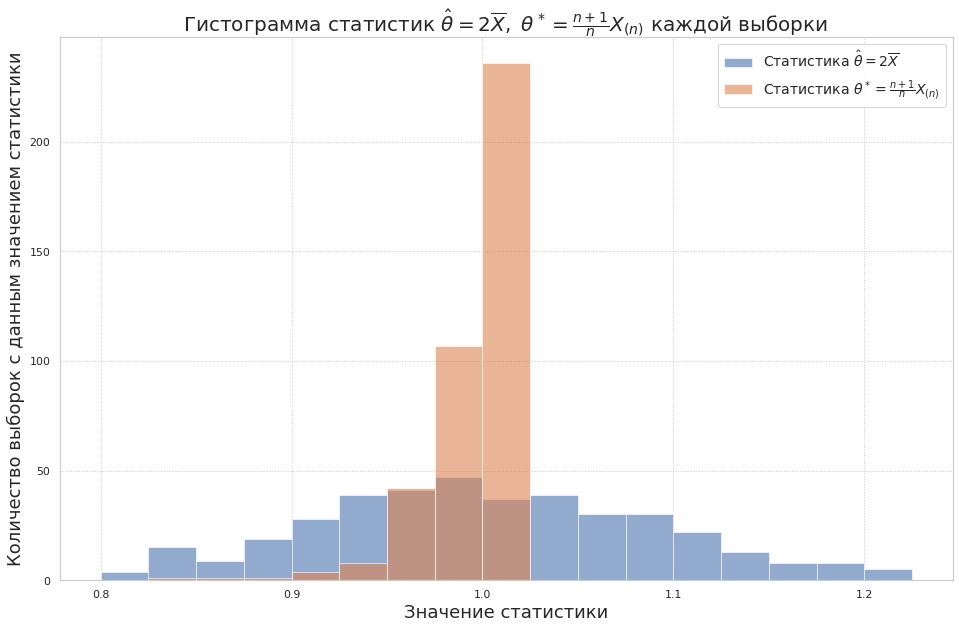

In [34]:
plt.figure(figsize=(16, 10))
plt.hist(estimator_first, bins=bins, 
     alpha=0.6, label=r'Статистика $\hat\theta = 2\overline{X}$') 
plt.hist(estimator_second, bins=bins, 
     alpha=0.6, label=r'Статистика $\theta^* = \frac{n+1}{n} X_{(n)}$') 
plt.xlabel('Значение статистики', fontsize=18)
plt.ylabel('Количество выборок с данным значением статистики', fontsize=18)
plt.title(r'Гистограмма статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ каждой выборки ', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

Вывод: самое частое значение статистик примерно 1. Причем вторая статистика больше сосредоточенна в этом значении, а первая распределена более равномерно от 0.8 до 1.2.

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

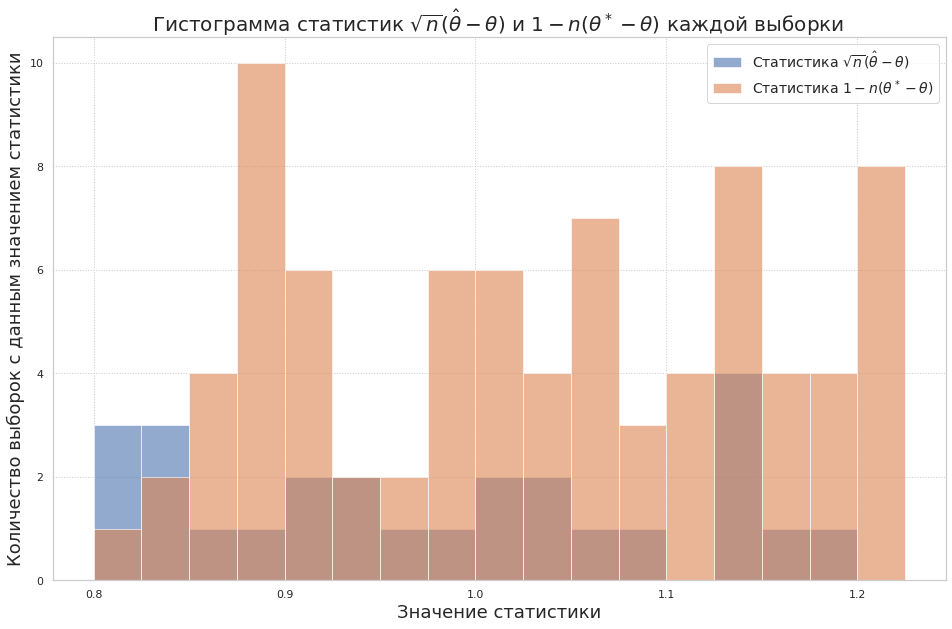

In [35]:
statistic_first = np.sqrt(N) * (np.asarray(estimator_first) - theta)
statistic_second = theta - N * (np.asarray(estimator_second) - theta)

plt.figure(figsize=(16, 10))
plt.hist(statistic_first, bins=bins, 
     alpha=0.6, label=r'Статистика $\sqrt{n} (\hat\theta - \theta)$') 
plt.hist(statistic_second, bins=bins, 
     alpha=0.6, label=r'Статистика $1 - n  (\theta^* - \theta)$') 
plt.xlabel('Значение статистики', fontsize=18)
plt.ylabel('Количество выборок с данным значением статистики', fontsize=18)
plt.title(r'Гистограмма статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$ каждой выборки ', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Первый график напоминает график нормального распределения, а второй...

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: Распишем по ЦПТ, далее приведем к тому, чтобы у нас получилась 
$$
\sqrt{n}\left(2\overline{X} - \theta\right) \xrightarrow{d} N(0, \frac{\theta^2}{3})
$$
Следовательно 
$$
\sigma(\theta) = \frac{\theta^2}{3}
$$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

/tmp/ipykernel_5386/793737616.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


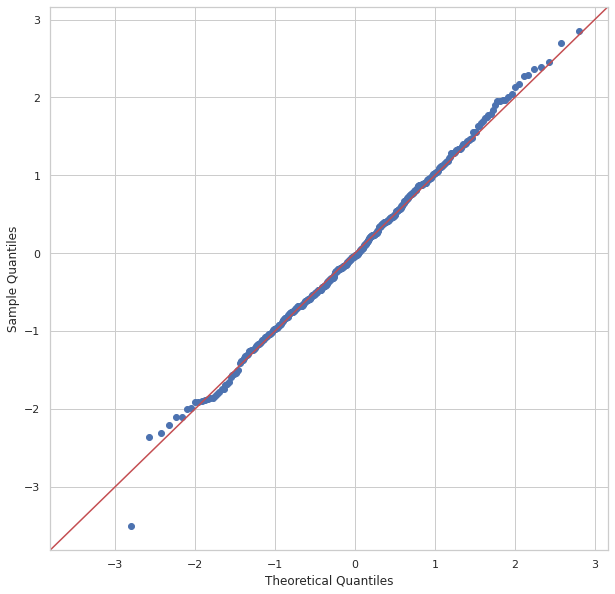

In [36]:
import statsmodels.api as sm


theta_norm = np.sqrt(N) * (estimator_first - theta) / np.sqrt(theta ** 2 / 3)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** По графику мы видим, что квантили почти совпадают, значит да, можно утверждать. Более того по заданию выше это величина стремится к нормальному распределению

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** экспоненциальное

/tmp/ipykernel_5386/625549122.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


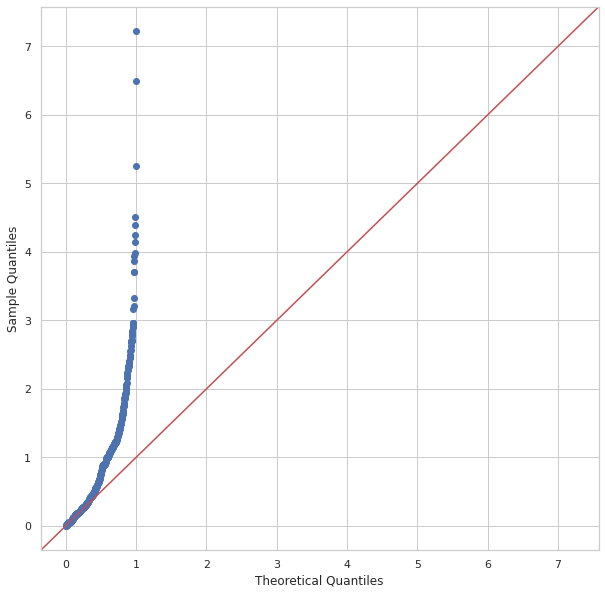

In [37]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(statistic_second, line='45', ax=ax, dist=sps.uniform)
fig.show()

Равномерное вообще не подходит(

/tmp/ipykernel_5386/2875731280.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


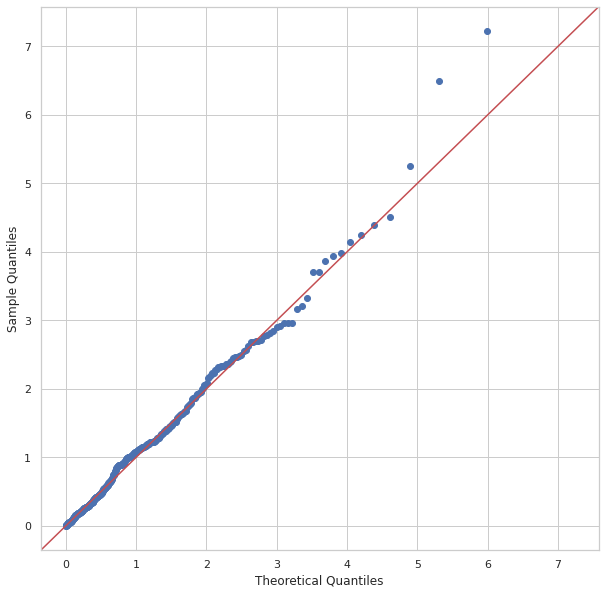

In [38]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(statistic_second, line='45', ax=ax, dist=sps.expon)
fig.show()

Ого, кажется это то, что нам нужно. Экспоненциальное подходит больше всего)

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** $\hat\theta$ асимптотически нормальна, следовательно $\hat\theta \xrightarrow{p} \theta$, или $\hat\theta-\theta \xrightarrow{p} 0$. Свойство асимптотической нормальности показывает, в частности, что скорость этой сходимости имеет порядок $\dfrac{1}{\sqrt{n}}$, т.е. расстояние между $\hat\theta$ и $\theta$ ведет себя как $\dfrac{1}{\sqrt{n}}$  

А что происходит со скоростью сходимости, если нет асимптотической нормальности?
По ЦПТ: есть сходимость $n(X_{(n)}-\theta) \rightarrow \xi$, где $\xi$ — некоторая случайная величина. Значит расстояние между $\theta^*$ и $\theta$ ведет себя как $\dfrac{1}{n}$. Как можно догадаться скорость сходимости получается выше и значит $\theta^*$ «выгоднее».

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.